# Classification dengan KNN (K Nearest Neighbours)

* KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.

* Prediksi yang dilakukan dapat diterapkan pada classification maupun regression tasks.

# Sample Dataset

In [1]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 170],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,170,67,wanita


# Visualisasi Data

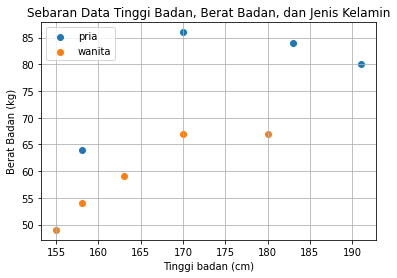

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

# Classification dengan KNN

# Preprocessing Dataset

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train: \n {X_train} \n')
print(f'y_train: {y_train}')
print(X_train.shape)

X_train: 
 [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [170  67]] 

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']
(9, 2)


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: \n {y_train}')

y_train: 
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
y_train = y_train.flatten()

In [6]:
print(y_train)

[0 0 0 0 1 1 1 1 1]


# Training KNN Classification Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Prediksi Jenis Kelamin

In [8]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [9]:
y_new = model.predict(X_new)
y_new

array([1])

In [10]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

# Visualisasi Nearest Neighbours

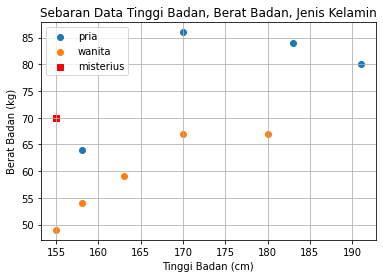

In [11]:
for jk, d in sensus_df.groupby('jk'):
    plt.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

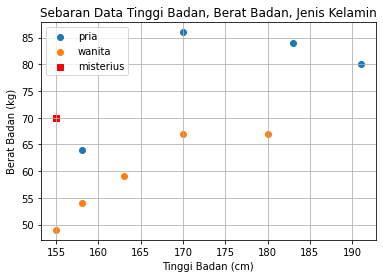

In [12]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

# Kalkulasi Distance (Euclidean Distance)

distance = $\sqrt{(t_1-t_2)^2 + (b_1 - b_2)^2} $

In [13]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [14]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [170,  67]], dtype=int64)

In [15]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 15.297058540778355]

In [16]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
8,170,67,wanita,15.297059
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


# Evaluasi KNN classification Model

# Testing Set

In [17]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]



# Prediksi terhadap testing set

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)

# Accuracy

Accuracy is the proportion of test instances that were classified correctly.

\begin{equation*}
\frac{tp + tn}{tp + tn + fp + fn}
\end{equation*}

* True Positif: sesuatu yang positif telah tepat diprediksi sebagai prediksi positif
* True Negatif: sesuatu yang negatif telah tepat diprediksi sebagai prediksi negatif
* contoh TP = model sudah tepat memprediksi pria sebagai pria dan wanita sebagai wanita
* Contoh TN = model sudah tepat memprediksi wanita sebagai bukan pria, dan data pria sebagai bukan wanita.

* False Positif = sesuatu yang negatif telah keliru diprediksi sebagai positif
* False Negatif = sesuatu yang positif telah keliru diprediksi sebagai negatif
* Contoh FP = prediksi keliru data wanita sebagai pria, dan data wanita sebagai data pria
* Contoh FN = prediksi keliru data pria sebagai bukan pria, dan data wanita sebagai data bukan wanita

In [19]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.75


# Precission

Precission is the proportion of test instances that were predict to be positive are truly positive.

\begin{equation*}
precission = \frac{tp}{tp + fp}
\end{equation*}

In [20]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print(f'precission: {prec}')

precission: 0.6666666666666666


# Recall

Recall is the proportion of truly positive test instances that were predicted to be positive.

.

\begin{equation*}
precission = \frac{tp}{tp + fn}
\end{equation*}


In [21]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print(f'recall: {rec}')

recall: 1.0


# F1 score

The F1 score is harmonic mean of precision and recall.

\begin{equation*}
    F1 = \frac{precision * recall}{precision + recall}
\end{equation*}


In [22]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-SCORE: {f1}')

F1-SCORE: 0.8


# Classification report

In [23]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report: \n{cls_report}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



# Matthews Correlation Coefficient (MCC)

* MCC is an alternative to the F1 score for measuring the performance of binary classifier
* A perfect classifier's MCC is 1.
* A trivial classifier that predicts randomly will score 0, and perfectly wrong classifier will score -1

\begin{equation*}
MCC = \frac{tp * tn + fp * fn}{\sqrt{(tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)}}
\end{equation*}

In [24]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.5773502691896258
